In [1]:
import os
import csv
import numpy as np
import pandas as pd
from prettytable import PrettyTable
from sklearn import linear_model, metrics
import scipy.stats as st
from scipy import interpolate
import matplotlib.pyplot as plt
import seaborn as sns
import copy

In [2]:
# Changing Directory
os.chdir("A:\\WebEconomics\\dataset")

In [3]:
# Reading Data
df = pd.read_csv('train.csv')

In [24]:
features = ["click", "weekday", "hour", "region","city", "slotwidth", 'slotheight', 'useragent', \
            'payprice', 'bidprice', 'slotformat', 'advertiser']
df = df[features]
df = df.dropna()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2697738 entries, 0 to 2697737
Data columns (total 12 columns):
click         int64
weekday       int64
hour          int64
region        int64
city          int64
slotwidth     int64
slotheight    int64
useragent     object
payprice      int64
bidprice      int64
slotformat    object
advertiser    int64
dtypes: int64(10), object(2)
memory usage: 267.6+ MB


In [26]:
df.head()

,click,weekday,hour,region,city,slotwidth,slotheight,useragent,payprice,bidprice,slotformat,advertiser
0,0,1,14,80,85,468,60,windows_ie,54,300,0,1458
1,0,2,20,94,95,250,250,windows_chrome,42,249,0,3476
2,0,5,9,216,217,336,280,windows_ie,76,300,1,1458
3,0,2,20,216,221,728,90,windows_ie,182,238,0,3427
4,0,6,9,40,48,950,90,windows_chrome,34,238,1,3476


In [27]:
df[df['payprice'] == 300].shape

(1587, 12)

In [28]:
## Defining Impression, Click, and cost
impression = df[ (df['bidprice'] > df['payprice']) | (df['bidprice'] == 300) ]
click = impression[impression['click'] == 1 ]
cost = impression['payprice'].sum()

In [29]:
print(impression.shape[0], click.shape[0], cost)

2662626 1984 207823538


In [30]:
x = PrettyTable(["Variable", "Number"])
x.align["Number"] = "1" # Left align  
x.padding_width = 0 # One space between column edges and contents (default)

x.add_row(["Cost", cost])

                 
x.add_row(["Impression", impression.shape[0]])
                 
                 
x.add_row(["Click", click.shape[0]])          
                 
                 
x.add_row(["CTR", click.shape[0]/impression.shape[0]])                 
          
               
# avg CPM = cost per thousand impressions
x.add_row(["avg CPM", cost  /  ( impression.shape[0] / 1000) ])
                 
                 
# avg CPC = cost per click
x.add_row(["avg CPC", cost/click.shape[0]])
                 
                
              
print(x)

+----------+---------------------+
| Variable |        Number       |
+----------+---------------------+
|   Cost   |      207823538      |
|Impression|       2662626       |
|  Click   |         1984        |
|   CTR    |0.0007451290568033212|
| avg CPM  |  78052.09518723245  |
| avg CPC  |  104749.76713709677 |
+----------+---------------------+


## Observing Click by Weekday

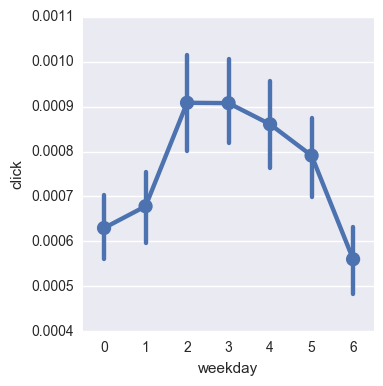

In [40]:
# plot histgram
sns.factorplot('weekday', 'click', data = df)
plt.show()